In [2]:

import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import re
from skimage.io import imread, imshow, imsave
from skimage.transform import resize
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose, Dropout
import tensorflow.keras.losses
import tensorflow.keras.metrics
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import cv2
from utils import *

In [4]:
%matplotlib inline

K.set_image_data_format('channels_last')
                    #initiate the variables
smooth=1.0
img_rows = 96
img_cols = 96

set_train, set_mask, set_test, set_test_mask  = load_images(20000)

img_train= preprocessing(set_train, img_rows, img_cols, normalized=True)
img_mask= preprocessing(set_mask, img_rows, img_cols, mask=True)

test_set= preprocessing(set_test, img_rows, img_cols, normalized=True)
test_mask_set= preprocessing(set_test_mask, img_rows, img_cols, mask=True)
img_ROI1=[]
mask_ROI1=[]
img_ROI_test=[]
mask_ROI_test=[]

for i in range(len(img_mask)): #to take only the image with a region of interest (nerve)
    if img_mask[i].sum()!=0:
        mask_ROI1.append(img_mask[i])
        img_ROI1.append(img_train[i])
        
for i in range(len(test_mask_set)):
    if test_mask_set[i].sum()!=0:
        mask_ROI_test.append(test_mask_set[i])
        img_ROI_test.append(test_set[i])

    

In [5]:

print(np.asarray(img_ROI1).shape)
print(np.asarray(mask_ROI1).shape)      

mask_ROI_F= mask2channels(mask_ROI1)
test_mask_ROI_F= mask2channels(mask_ROI_test)

img_maskf = mask2channels(img_mask)

    

(2141, 96, 96, 1)
(2141, 96, 96, 1)


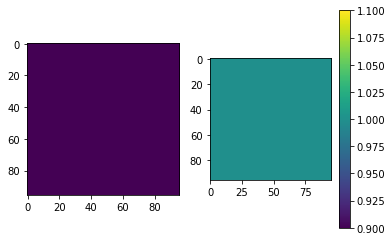

In [6]:
n=89
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_mask[n,:,:,0])
plt.subplot(1,2,2)
plt.imshow(img_maskf[n,:,:,1])
plt.colorbar()
plt.show()




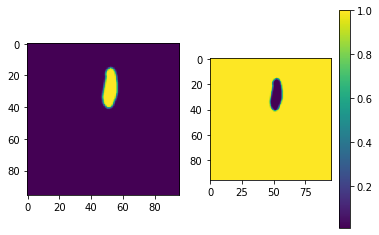

In [7]:


n=540
plt.figure()
plt.subplot(1,2,1)
plt.imshow(mask_ROI_F[n,:,:,0])
plt.subplot(1,2,2)
plt.imshow(mask_ROI_F[n,:,:,1])
plt.colorbar()
plt.show()



(96, 96, 1)


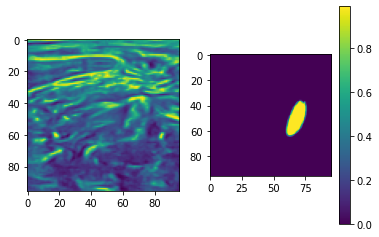

In [8]:

print(img_ROI1[73].shape)
n=67
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_ROI1[n])
plt.subplot(1,2,2)
plt.imshow(mask_ROI1[n])
plt.colorbar()
plt.show()


In [9]:

image = cv2.imread('canny.tif')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

# apply Canny edge detection using a wide threshold, tight
# threshold, and automatically determined threshold
wide = cv2.Canny(blurred, 10, 200)
tight = cv2.Canny(blurred, 225, 250)
auto = auto_canny(blurred)

# show the images
cv2.imshow("Original", image)
cv2.imshow("Edges", np.hstack([wide]))
cv2.waitKey(0)


In [ ]:
model = get_unet()



model_Early= EarlyStopping(monitor="val_dice_coef_multilabel", patience=10, verbose=2, mode="max")

model_checkpoint = ModelCheckpoint('weights.h5', monitor='val_dice_coef_multilabel', mode="max", save_best_only=True)



history = model.fit(np.asarray(img_ROI1), mask_ROI_F, batch_size=32, epochs=20,  verbose=1, shuffle=True,
              validation_split=0.2, callbacks=[model_checkpoint, model_Early])

model.save("modelok")
